# Midterm 

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/wweissbluth/dan-midterm-repo/blob/main/midterm.ipynb)

In [1]:
import pandas as pd

# Load the Excel file into a dictionary of DataFrames
file_path = '/Users/warrenweissbluth/Documents/code_repos/dan-midterm-repo/UCS-Satellite-Database 5-1-2023.xlsx'
dfs = pd.read_excel(file_path, sheet_name=None)

# Load the first sheet of the Excel file into a DataFrame, ignoring columns with no data
df = pd.read_excel(file_path, sheet_name=0).dropna(axis=1, how='all')

# Display the first few rows of the DataFrame
display(df)


,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAC AIS-Sat1 (Kelpie 1),AAC AIS-Sat1 (Kelpie 1),United Kingdom,United Kingdom,AAC Clyde Space,Commercial,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAt-4,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,Ziyuan 1-02C,Ziyuan 1-02C,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,Ziyuan 1-2D,Ziyuan 1-2D,NR,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Hyperspectral Imaging,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,Ziyuan 3 (ZY-3),Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,Ziyuan 3-2,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Convert 'Dry Mass (kg.)' column to numeric, coercing errors to NaN
df['Dry Mass (kg.)'] = pd.to_numeric(df['Dry Mass (kg.)'], errors='coerce')

# Calculate the number of rows before cleaning
initial_row_count = df.shape[0]

# Drop rows with NaN values in the 'Dry Mass (kg.)' column
df_clean = df.dropna(subset=['Dry Mass (kg.)'])

# Calculate the number of rows after cleaning
final_row_count = df_clean.shape[0]

# Calculate the total rows removed
rows_removed = initial_row_count - final_row_count

# Print the total rows removed and the total rows remaining
print(f'Total rows removed: {rows_removed}')
print(f'Total rows remaining: {final_row_count}')
print(f'Total rows: {initial_row_count}')

Total rows removed: 6796
Total rows remaining: 764
Total rows: 7560


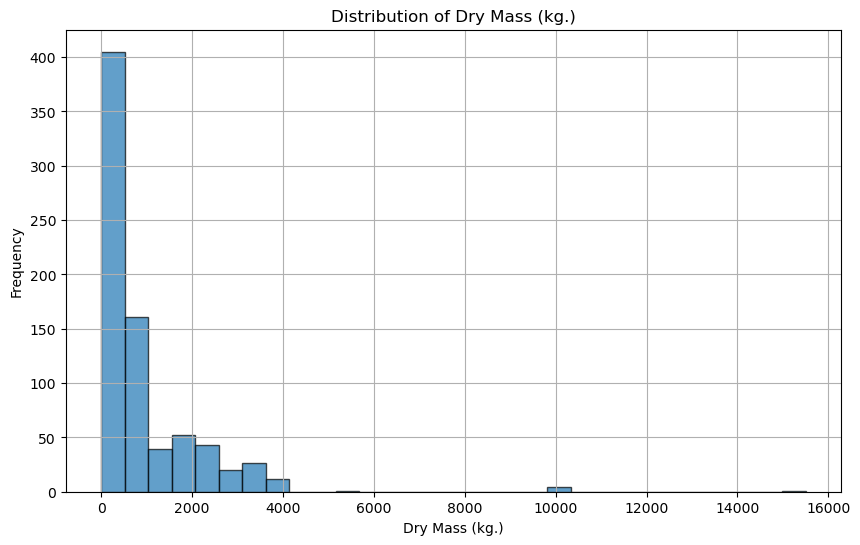

In [3]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Dry Mass (kg.)'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Dry Mass (kg.)')
plt.xlabel('Dry Mass (kg.)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [4]:
from sklearn.cluster import KMeans

# Select the 'Dry Mass (kg.)' column for clustering
X = df_clean[['Dry Mass (kg.)']]

# Initialize the KMeans algorithm with a specified number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the KMeans algorithm to the data
kmeans.fit(X)

# Add the cluster labels to the dataframe
df_clean.insert(0, 'Cluster', kmeans.labels_)

# Calculate the mean dry mass for each cluster
mean_dry_mass = df_clean.groupby('Cluster')['Dry Mass (kg.)'].mean()

# Sort clusters by mean mass
sorted_clusters = mean_dry_mass.sort_values().index
df_clean['Cluster'] = df_clean['Cluster'].apply(lambda x: sorted_clusters.get_loc(x))

# Display the first few rows of the dataframe with the cluster labels
display(df_clean.head())

/var/folders/bh/bs5kljm140s_4k8bp_hzf8n00000gn/T/ipykernel_5145/2907841812.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = df_clean['Cluster'].apply(lambda x: sorted_clusters.get_loc(x))


,Cluster,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
1,0,AAC AIS-Sat1 (Kelpie 1),AAC AIS-Sat1 (Kelpie 1),United Kingdom,United Kingdom,AAC Clyde Space,Commercial,Earth Observation,Automatic Identification System (AIS),LEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,"ABS-4 (ABS-2i, MBSat, Mobile Broadcasting Sate...",ABS-4,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,"ABS-6 (ABS-1, LMI-1, Lockheed Martin-Intersput...",ABS-6,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0,ADLER-2,ADLER-2,NR (9/23),Austria,Austrian Space Forum (OEWF)/Spire,Civil,Earth Science,NaN,LEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,1,"Afghansat-1 (Eutelsat 48D [Eutelsat 48B, Eutel...",Eutelsat 48D,France,Multinational,EUTELSAT S.A.,Commercial,Communications,NaN,GEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


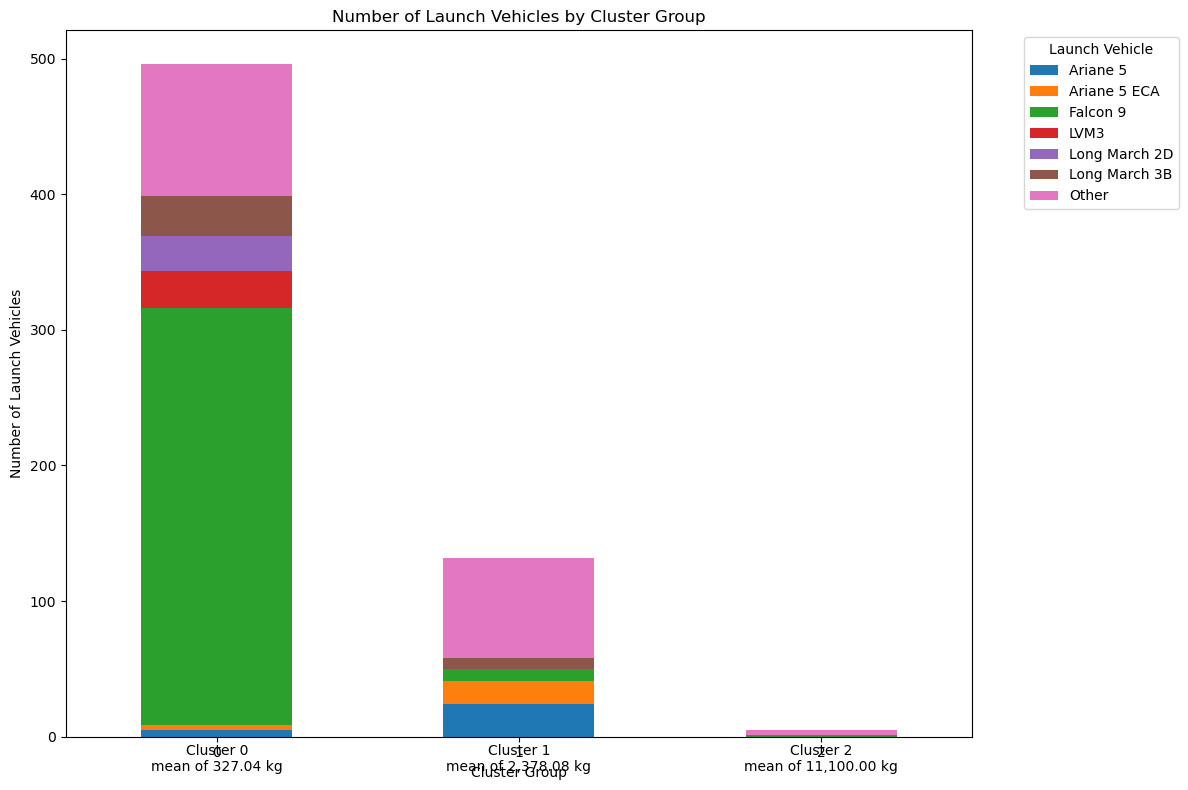

In [5]:
import matplotlib.pyplot as plt

# Group by 'Cluster' and 'Launch Vehicle', and count the occurrences
launch_vehicle_counts = df_clean.groupby(['Cluster', 'Launch Vehicle']).size().unstack(fill_value=0)

# Combine launch vehicles with less than 10 occurrences into 'Other'
launch_vehicle_counts['Other'] = launch_vehicle_counts.loc[:, launch_vehicle_counts.sum() < 10].sum(axis=1)
launch_vehicle_counts = launch_vehicle_counts.loc[:, launch_vehicle_counts.sum() >= 20]
launch_vehicle_counts['Other'] = launch_vehicle_counts['Other']

# Calculate the mean dry mass for each cluster
mean_dry_mass = df_clean.groupby('Cluster')['Dry Mass (kg.)'].mean()

# Plot the stacked bar chart
ax = launch_vehicle_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Annotate the mean dry mass below each cluster group
for idx, (cluster, mean_mass) in enumerate(mean_dry_mass.items()):
    ax.text(idx, -5, f'Cluster {cluster}\nmean of {mean_mass:,.2f} kg', ha='center', va='top', fontsize=10, color='black')

plt.title('Number of Launch Vehicles by Cluster Group')
plt.xlabel('Cluster Group')
plt.ylabel('Number of Launch Vehicles')
plt.legend(title='Launch Vehicle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
# Group by 'Cluster' and get summary statistics for 'Dry Mass (kg.)'
cluster_summary = df_clean.groupby('Cluster')['Dry Mass (kg.)'].describe()

# Display the summary statistics
display(cluster_summary)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,578.0,327.044118,324.587508,1.0,50.0,221.0,678.0,1330.0
1,181.0,2378.082873,787.283260,1375.0,1700.0,2180.0,2975.0,5624.0
2,5.0,11100.000000,2459.674775,10000.0,10000.0,10000.0,10000.0,15500.0


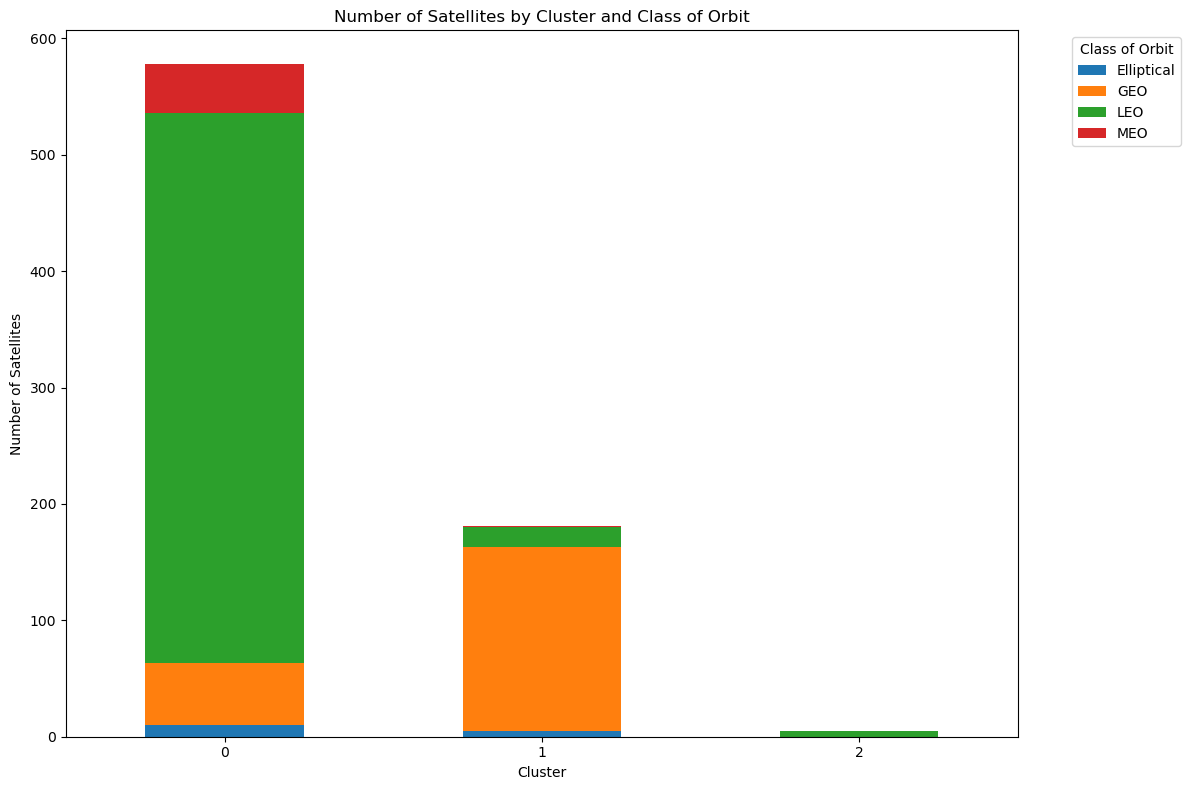

In [8]:
# Group by 'Cluster' and 'Class of Orbit', and count the occurrences
orbit_class_counts = df_clean.groupby(['Cluster', 'Class of Orbit']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ax = orbit_class_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Number of Satellites by Cluster and Class of Orbit')
plt.xlabel('Cluster')
plt.ylabel('Number of Satellites')
plt.legend(title='Class of Orbit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()